In [1]:
!cd imc_sparse_ops \
  && CC=gcc CFLAGS="-fopenmp -std=c99" \
    python setup.py build_ext --inplace --force

running build_ext
building 'imc_ops.ops' extension
gcc -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fopenmp -std=c99 -fPIC -I/nmnt/media/home/boris/env3.6/lib/python3.6/site-packages/numpy/core/include -Iimc_ops/src/include -I/nmnt/media/home/boris/env3.6/include -I/nmnt/media/home/boris/python3.6.1/include/python3.6m -c imc_ops/ops.c -o build/temp.linux-x86_64-3.6/imc_ops/ops.o
In file included from /nmnt/media/home/boris/env3.6/lib/python3.6/site-packages/numpy/core/include/numpy/ndarraytypes.h:1809:0,
                 from /nmnt/media/home/boris/env3.6/lib/python3.6/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /nmnt/media/home/boris/env3.6/lib/python3.6/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from imc_ops/ops.c:466:
/nmnt/media/home/boris/env3.6/lib/python3.6/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from estimate import estimate
from utils_plot import plot_loss

%matplotlib inline
%load_ext cython

In [3]:
PROBLEM = "classification" if False else "regression"
STEP = "decoupled" if False else "qaadmm"

seed = 0x0BADCAFE
b_add_noise = True
noise_scale = 1e-3

n_samples, n_objects = 299, 301
n_rank, n_features = 11, 21

mask_scale = 0.1

K = 10  # n_rank

C = None
eta = None

n_iterations = 2000

if PROBLEM == "classification":
    C = 1e0, 1e-1, 1e-3
    eta = 1e0
elif PROBLEM == "regression":
    C = 2e-3, 2e-4, 0
    eta = 1e1
else: 
    assert PROBLEM in ("classification", "regression")
    
if STEP == "decoupled":
    eta = 1e-3

In [4]:
losses, titles, norm_types = \
    estimate(STEP, PROBLEM, n_samples=n_samples, n_objects=n_objects,
             n_rank=n_rank, n_features=n_features, seed=seed,
             noise=b_add_noise, noise_scale=noise_scale, K=K, C=C,
             eta=eta, mask_scale=mask_scale, n_iterations=n_iterations)

  5%|▌         | 104/2000 [00:26<05:47,  5.46it/s, 2.562e-02 + 4.423e-02, 2.592e-01; Score 0.24%; W 93%, H 94%; W 2.836e-05, H 3.025e-05]


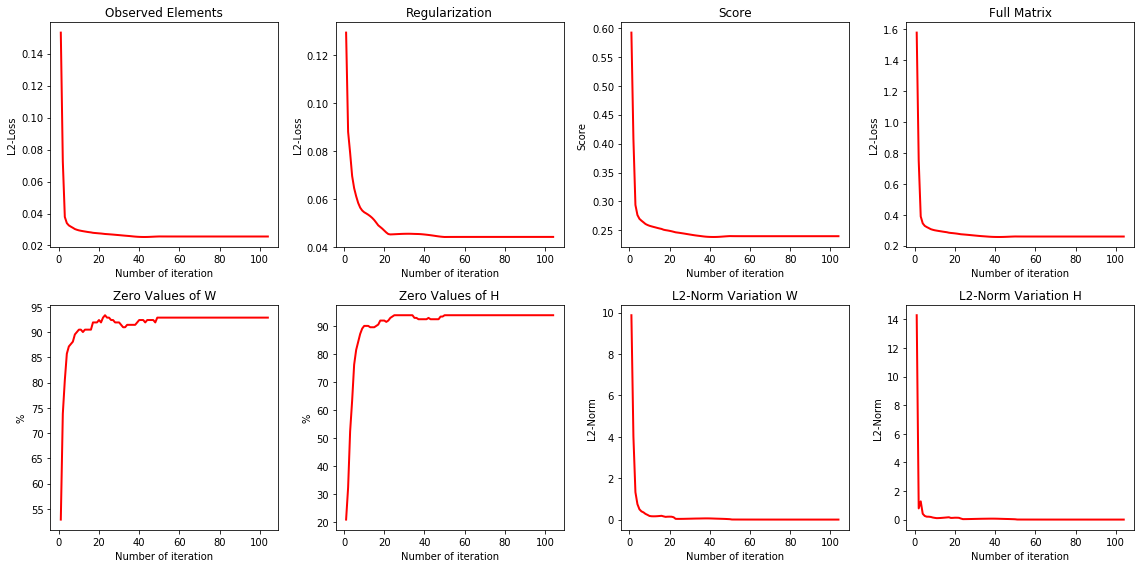

In [5]:
fig_size = 4
max_cols = 4
plot_loss(losses=losses, titles=titles, y_names=norm_types,
          fig_size=fig_size, max_cols=max_cols)